# Модуль 4. Мультимодальные и мультизадачные модели. Часть 2
## Семинар №7. Работа с библиотекой Pytorch WideDeep
### Цель занятия

Рассмотреть еще один пример мультимодальности, но уже на табличных данных.

## Introduction

`pytorch-widedeep` основан на [Google's Wide and Deep Algorithm](https://arxiv.org/abs/1606.07792), который адаптирован для мультимодальных наборов данных.

В общих чертах, `pytorch-widedeep` – это библиотека для использования глубокого обучения с табличными данными. В частности, она предназначена облегчить сочетание текста и изображений с соответствующими табличными данными, используя широкие и глубокие модели. Существует ряд архитектур, которые можно реализовать с помощью всего лишь нескольких строк кода. Основные компоненты этих архитектур показаны на рисунке ниже:

![](https://pytorch-widedeep.readthedocs.io/en/latest/docs/figures/widedeep_arch.png)

Пунктирные прямоугольники на рисунке обозначают дополнительные общие компоненты, а пунктирные стрелки — соответствующие соединения в зависимости от наличия или отсутствия определенных компонентов. Например, пунктирные синие стрелки указывают, что компоненты `deeptabular`, `deeptext` и `deepimage` напрямую связаны с выходным нейроном или нейронами (в зависимости от того, выполняем ли мы бинарную классификацию или регрессию, или многоклассовую классификацию), если дополнительный `deephead` отсутствует. Наконец, компоненты внутри бледно-розового прямоугольника объединяются.

Обратите внимание, что на одном рисунке невозможно проиллюстрировать количество возможных архитектур и компонентов, доступных в `pytorch-widedeep`. Поэтому для получения более подробной информации о возможных архитектурах (и не только) прочтите эту документацию.

В математических терминах, основываясь на обозначениях из [статьи Wide & Deep Learning for Recommender Systems](https://arxiv.org/abs/1606.07792), выражение для архитектуры без компонента `deephead` можно сформулировать как:

$$pred = \sigma(W^{T}_{wide}[x,\phi(x)] + W^{T}_{deeptabular}a^{l_f}_{deeptabular} + W^{T}_{deeptext}a^{l_f}_{deeptext} + W^{T}_{deepimage}a^{l_f}_{deepimage} + b),$$

где $\sigma$ — сигмоидная функция;
$W$ — весовые матрицы, применяемые к широкой модели и к окончательным функциям активации глубоких моделей;
$a$ — эти окончательные функции активации;
$\phi(x)$ — преобразования перекрестного произведения исходных функций;
$x$, и $b$ — это смещения.

В статье также дано определение термина «преобразования перекрестных продуктов»:

«Для бинарных функций преобразование перекрестных продуктов (например, «И(пол=женский, язык=en)») 1 тогда и только тогда, когда все составляющие признаки («пол=женщина» и «язык=en») равны 1, и 0 в противном случае».

А если есть компонент `deephead`, предыдущее выражение превращается в:

$$pred = \sigma(W^{T}_{wide}[x,\phi(x)] + W^{T}_{deephead}a^{l_f}_{deephead} + b)$$

Вполне возможно использовать пользовательские модели (и не обязательно те, что находятся в библиотеке), если у них есть атрибут под названием `output_dim` с размером последнего слоя функций активации, чтобы можно было создать `WideDeep`.

## Компонента deeptabular

Важно подчеркнуть, что каждый отдельный компонент — `wide`, `deeptabular`, `deeptext` and `deepimage` — может использоваться независимо и изолированно. Например, можно использовать только `wide`, что соответствует просто линейной модели.

Одна из наиболее интересных функций `pytorch-widedeep` — использование `deeptabular` отдельно, то есть того, что обычно можно назвать глубоким обучением табличных данных. В настоящее время `pytorch-widedeep` предлагает следующие различные модели для этого компонента:

*   **Wide** — простая линейная модель, в которой нелинейности фиксируются посредством преобразований перекрестных произведений, как объяснялось ранее.
*   **TabMlp** — простой MLP, который получает внедрения, представляющие категориальные функции, объединенные с непрерывными функциями, которые также можно встраивать.
*   **TabResnet** — аналогично предыдущей модели, но внедрения проходят через серию блоков ResNet, построенных из плотных слоев.
*   **TabNet** — подробную информацию о TabNet можно найти в [TabNet: Attentive Interpretable Tabular Learning](https://arxiv.org/abs/1908.07442).

Две более простые модели, основанные на внимании:

* **ContextAttentionMLP** — MLP с механизмом внимания «сверху», основанным на иерархических сетях внимания для классификации документов.
* **SelfAttentionMLP** — MLP с механизмом внимания, который представляет собой упрощенную версию блока-трансформера, который мы называем «самообслуживанием по ключу запроса».

Семейство `Tabformer`, т. е. трансформеры для табличных данных:

* **TabTransformer** – подробные сведения о TabTransformer можно найти в документе [TabTransformer: Tabular Data Modeling Using Contextual Embeddings](https://arxiv.org/pdf/2012.06678.pdf). Обратите внимание, что это «расширенная» реализация, которая позволяет использовать множество параметров, которые можно настроить с помощью `TabTransformer`.
* **SAINT** – подробности о SAINT можно найти в документе [SAINT: Improved Neural Networks for Tabular Data via Row Attention and Contrastive Pre-Training](https://arxiv.org/abs/2106.01342).
* **FT-Transformer** – подробную информацию о FT-Transformer можно найти в [Revisiting Deep Learning Models for Tabular Data](https://arxiv.org/abs/2106.11959).
* **TabFastFormer** – адаптация FastFormer для табличных данных. Подробную информацию о Fasformer можно найти в [FastFormers: Highly Efficient Transformer Models for Natural Language Understanding](https://arxiv.org/abs/2010.13382).
* **TabPerceiver** – адаптация Perceiver для табличных данных. Подробности о воспринимающем устройстве можно найти в [Perceiver: General Perception with Iterative Attention](https://arxiv.org/abs/2103.03206).

Предварительное обучение с самоконтролем можно использовать для всех моделей `deeptabular` (за исключением `TabPerceiver`) с помощью двух методов или процедур: метод энкодера-декодера и метод контрастного denoising. Пожалуйста, обратитесь к документации и примерам для получения подробной информации об этой функциональности и всех других опциях в библиотеке.

## Предварительная обработка датасета AirBnB

In [ ]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  2
  On-line CPU(s) list:   0,1
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:          6
    Model:               79
    Thread(s) per core:  2
    Core(s) per socket:  1
    Socket(s):           1
    Stepping:            0
    BogoMIPS:            4400.31
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clf
                         lush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_
                         good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fm
                         a cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hyp
                         ervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd i

In [ ]:
!pip install tensorrt

  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-8.6.1.post1-py2.py3-none-any.whl size=17281 sha256=cfb9fc5e8edcf7ec21b805575dfd27be94d66cc2b34ec6896cc5b553a195d91e
  Stored in directory: /root/.cache/pip/wheels/f4/c8/0e/b79b08e45752491b9acfdbd69e8a609e8b2ed7640dda5a3e59
Successfully built tensorrt


In [ ]:
!wget https://raw.githubusercontent.com/jrzaurin/pytorch-widedeep/master/requirements.txt
!pip install -r requirements.txt

--2023-10-20 14:29:37--  https://raw.githubusercontent.com/jrzaurin/pytorch-widedeep/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     179  --.-KB/s    in 0s      

2023-10-20 14:29:37 (6.87 MB/s) - ‘requirements.txt’ saved [179/179]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.0 MB/s eta 0:00:00


In [ ]:
!wget http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz
!gzip -d listings.csv.gz

--2023-10-20 14:29:52--  http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 52.216.49.5, 54.231.231.109, 54.231.234.21, ...
Connecting to data.insideairbnb.com (data.insideairbnb.com)|52.216.49.5|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54630253 (52M) [application/x-gzip]
Saving to: ‘listings.csv.gz’

listings.csv.gz     100%[===================>]  52.10M  20.7MB/s    in 2.5s    

2023-10-20 14:29:54 (20.7 MB/s) - ‘listings.csv.gz’ saved [54630253/54630253]



In [ ]:
import numpy as np
import pandas as pd
import warnings

from pathlib import Path

warnings.filterwarnings("ignore")

# DATA_PATH = Path("../tmp_data/airbnb/")
df_original = pd.read_csv("listings.csv")
print(df_original.shape)
df_original.head()

(87946, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.82,4.69,4.69,NaN,f,2,1,1,0,0.26
3,15400,https://www.airbnb.com/rooms/15400,20230906022807,2023-09-06,city scrape,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1,1,0,0,0.56
4,93734,https://www.airbnb.com/rooms/93734,20230906022807,2023-09-07,city scrape,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,497514,...,4.81,4.64,4.67,NaN,f,1,0,1,0,1.21


Наша цель — спрогнозировать «доходную» стоимость недвижимости, то есть меру того, насколько прибыльной может быть недвижимость. С этой целью нам следует сохранять только те характеристики, которые известны на момент регистрации владельца недвижимости на `Airbnb`, и которые необходимы для оценки «доходности» (цена и количество отзывов в месяц). Не следует включать оценки по отзывам, тогда как описание или внутренние правила вполне могут быть частью нашего набора данных.

In [ ]:
keep_cols = [
    "id",
    "host_id",
    "description",
    "host_name",
    "host_listings_count",
    "host_identity_verified",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "price",
    "minimum_nights",
    "instant_bookable",
    "reviews_per_month",
]

In [ ]:
import gc

df = df_original[keep_cols]
df = df[~df.reviews_per_month.isna()]
df = df[~df.description.isna()]
df = df[~df.host_listings_count.isna()]
df = df[:2000]
df.shape

del df_original
gc.collect()
print(df.shape)

(2000, 18)


### Host name

Используем имена, чтобы определить пол, с помощью `gender_guesser`.

In [ ]:
!pip install gender_guesser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
import gender_guesser.detector as gender
from collections import Counter

host_name = df.host_name.tolist()
d = gender.Detector()
host_gender = [d.get_gender(n) for n in host_name]
replace_dict = {"mostly_male": "male", "mostly_female": "female", "andy": "unknown"}
host_gender = [replace_dict.get(item, item) for item in host_gender]
Counter(host_gender)

Counter({'unknown': 363, 'female': 970, 'male': 667})

In [ ]:
df["host_gender"] = host_gender
df.drop("host_name", axis=1, inplace=True)

### Property type, room type, accommodates, bathrooms, bedrooms, beds and guests included, host listings count, minimum nights

Далее некоторая стандартная предварительная обработка.

In [ ]:
df.property_type.value_counts()
replace_prop_type = [
    val
    for val in df.property_type.unique().tolist()
    if val not in ["Apartment", "House"]
]
replace_prop_type = {k: "other" for k in replace_prop_type}
df.property_type.replace(replace_prop_type, inplace=True)
df["property_type"] = df.property_type.apply(lambda x: "_".join(x.split(" ")).lower())

In [ ]:
df.room_type.value_counts()
df["room_type"] = df.room_type.apply(lambda x: "_".join(x.split(" ")).lower())

In [ ]:
df["bathrooms"][(df.bathrooms.isna()) & (df.room_type == "private_room")] = 0
df["bathrooms"][(df.bathrooms.isna()) & (df.room_type == "entire_home/apt")] = 1
df.bedrooms.fillna(1, inplace=True)
df.beds.fillna(1, inplace=True)

In [ ]:
df.bathrooms.fillna(1, inplace = True)

In [ ]:
df.columns

Index(['id', 'host_id', 'description', 'host_listings_count',
       'host_identity_verified', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'instant_bookable', 'reviews_per_month',
       'host_gender'],
      dtype='object')

In [ ]:
# Кодируем категориальные признаки
categorical_cut = [
    ("accommodates", 3),
    ("minimum_nights", 3),
    ("host_listings_count", 3),
    ("bathrooms", 1.5),
    ("bedrooms", 3),
    ("beds", 3),
]

for col, cut in categorical_cut:
    new_colname = col + "_catg"
    df[new_colname] = df[col].apply(lambda x: cut if x >= cut else x)
    df[new_colname] = df[new_colname].round().astype(int)

### Price, security_deposit, cleaning_fee, extra_people

In [ ]:
from functools import reduce
from itertools import chain

In [ ]:
money_columns = ["price"]
tmp_money_df = df[money_columns].fillna("$0")

money_repls = (("$", ""), (",", ""))
for col in money_columns:
    val_str = tmp_money_df[col].tolist()
    val_num = [
        float(st)
        for st in [
            reduce(lambda a, kv: a.replace(*kv), money_repls, s) for s in val_str
        ]
    ]
    tmp_money_df[col] = val_num

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

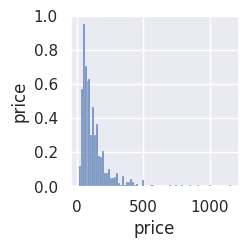

In [ ]:
sns.pairplot(tmp_money_df)

In [ ]:
high_price, high_deposit, high_cleaning_fee, high_extra_people = 1000, 2000, 200, 100

high_price_count = (tmp_money_df.price >= high_price).sum()

print("properties with very high price: {}".format(high_price_count))

properties with very high price: 3


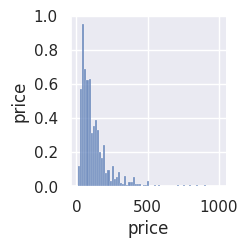

In [ ]:
sns.pairplot(
    tmp_money_df[
        (tmp_money_df.price < high_price)
    ]
)

Явной корреляции между ценой и «залогом» или «лишними людьми» нет. Это хорошо, продолжаем.

In [ ]:
# Теперь мы просто конкатенируем. Высокие значения отбросим позже
high_price = 1000
df.drop(money_columns, axis=1, inplace=True)
df = pd.concat([df, tmp_money_df], axis=1)
df = df[
    (df.price < high_price)
    & (df.price != 0)
]
print(df.shape)

(1997, 24)


In [ ]:
# Проверяем, что не осталось NaN значений
has_nan = df.isnull().any(axis=0)
has_nan = [df.columns[i] for i in np.where(has_nan)[0]]
if not has_nan:
    print("no NaN, all OK")

no NaN, all OK


**Вычисление «прокси» для доходности.**
Доходность определяется как:
$$yield = price * occupancy \: rate$$

Заполняемость можно рассчитать как:
$$occupancy \: rate = (reviews\: / review \: rate) * average\: length\: of\: stay$$

Частота пересмотров и средняя продолжительность пребывания обычно принимаются как константа, основанная на какой-либо модели. Например, в модели [Сан-Франциско](http://insideairbnb.com/about.html) коэффициент отзывов 0,5 используется для преобразования отзывов в предполагаемое количество бронирований (т. е. мы предполагаем, что только половина гостей оставит отзыв). Средняя продолжительность пребывания в 3 ночи, умноженная на предполагаемое количество бронирований за период, дает уровень заполняемости. Следовательно, в выражении, которое используется ниже, если мы хотим превратить реализацию «доходности» в «правильную» в соответствии с предположениями модели Сан-Франциско, нужно умножить доходность на 6 $3\times$(1/0,5)) или на 72 (3$\times$2$\times$12).

In [ ]:
df["yield"] = (df["price"])
df.drop(["price"], axis=1, inplace=True)

<Axes: xlabel='yield', ylabel='Density'>

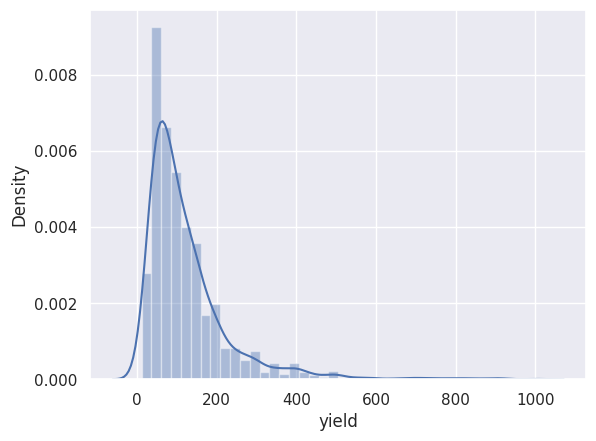

In [ ]:
sns.distplot(df["yield"], bins=40)

In [ ]:
np.percentile(df["yield"], 97)

400.0

<Axes: xlabel='yield', ylabel='Density'>

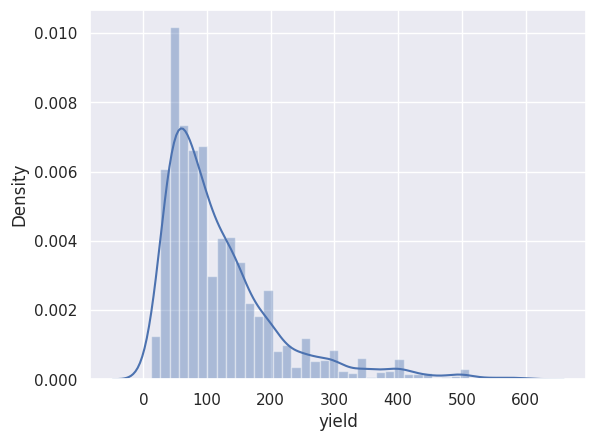

In [ ]:
sns.distplot(df[df["yield"] <= 600]["yield"], bins=40)

## Регрессия с текстом

Мы рассмотрим серию примеров, как объединить все компоненты Wide и Deep.

In [ ]:
!pip install pytorch_widedeep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 14.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import os
import torch

from pytorch_widedeep import Trainer
from pytorch_widedeep.preprocessing import (
    WidePreprocessor,
    TabPreprocessor,
    TextPreprocessor,
)
from pytorch_widedeep.models import (
    Wide,
    TabMlp,
    BasicRNN,
    WideDeep,
)
from pytorch_widedeep.losses import RMSELoss
from pytorch_widedeep.initializers import *
from pytorch_widedeep.callbacks import *

### Регрессия со значениями по умолчанию

In [ ]:
# There are a number of columns that are already binary. Therefore, no need to one hot encode them
crossed_cols = [("property_type", "room_type")]
wide_cols = [
    "property_type",
    "room_type",
    "host_gender",
    "instant_bookable",
]
# + already_dummies

cat_embed_cols = [(c, 16) for c in df.columns if "catg" in c]
continuous_cols = ["latitude", "longitude"]
already_standard = ["latitude", "longitude"]

# text  colnames
text_col = "description"

# target
target_col = "yield"

### Подготовка данные

In [ ]:
target = df[target_col].values

In [ ]:
wide_preprocessor = WidePreprocessor(wide_cols=wide_cols, crossed_cols=crossed_cols)
X_wide = wide_preprocessor.fit_transform(df)

In [ ]:
tab_preprocessor = TabPreprocessor(
    cat_embed_cols=cat_embed_cols,
    continuous_cols=continuous_cols,
    already_standard=already_standard,
)
X_tab = tab_preprocessor.fit_transform(df)

In [ ]:
text_preprocessor = TextPreprocessor(
    text_col=text_col, max_vocab=3000, min_freq=5, maxlen=20, n_cpus=1
)
X_text = text_preprocessor.fit_transform(df)

### Создаем компоненты модели

In [ ]:
# Linear model
wide = Wide(input_dim=np.unique(X_wide).shape[0], pred_dim=1)

# DeepDense: 2 Dense layers
tab_mlp = TabMlp(
    column_idx=tab_preprocessor.column_idx,
    cat_embed_input=tab_preprocessor.cat_embed_input,
    cat_embed_dropout=0.1,
    continuous_cols=continuous_cols,
    mlp_hidden_dims=[64, 32],
    mlp_dropout=0.1,
)

# DeepText: a stack of 2 LSTMs
basic_rnn = BasicRNN(
    vocab_size=len(text_preprocessor.vocab.itos),
    embed_dim=100,
    n_layers=2,
    hidden_dim=32,
    rnn_dropout=0.5,
)

### Объединяем их все с помощью "коллектор" класса WideDeep.

In [ ]:
model = WideDeep(
    wide=wide,
    deeptabular=tab_mlp,
    deeptext=basic_rnn,
    head_hidden_dims=[128, 64],
)

In [ ]:
target

### Собираем trainer и запускаем

In [ ]:
trainer = Trainer(model, objective="rmse", device='cpu', num_workers=1)

In [ ]:
trainer.fit(
    X_wide=X_wide,
    X_tab=X_tab,
    X_text=X_text,
    target=target,
    n_epochs=1,
    batch_size=2,
    val_split=0.2,
)

Оба компонента Text и Image позволяют использовать FC-heads самостоятельно (см. документацию).

Теперь используем разные оптимизаторы, инициализаторы и планировщики для разных компонентов, а также разную скорость обучения для разных групп параметров для глубокотабличного компонента.

In [ ]:
deep_params = []
for childname, child in model.named_children():
    if childname == "deeptabular":
        for n, p in child.named_parameters():
            if "embed_layer" in n:
                deep_params.append({"params": p, "lr": 1e-4})
            else:
                deep_params.append({"params": p, "lr": 1e-3})

In [ ]:
wide_opt = torch.optim.Adam(model.wide.parameters(), lr=0.03)
deep_opt = torch.optim.Adam(deep_params)
text_opt = torch.optim.AdamW(model.deeptext.parameters())
head_opt = torch.optim.Adam(model.deephead.parameters())

In [ ]:
wide_sch = torch.optim.lr_scheduler.StepLR(wide_opt, step_size=5)
deep_sch = torch.optim.lr_scheduler.MultiStepLR(deep_opt, milestones=[3, 8])
text_sch = torch.optim.lr_scheduler.StepLR(text_opt, step_size=5)
head_sch = torch.optim.lr_scheduler.StepLR(head_opt, step_size=5)

In [ ]:
# Помните, что на каждый компонент модели приходится по одному оптимизатору,
# Для lr_scheduler и инициализаторов не требуется
optimizers = {
    "wide": wide_opt,
    "deeptabular": deep_opt,
    "deeptext": text_opt,
    "deephead": head_opt,
}
schedulers = {
    "wide": wide_sch,
    "deeptabular": deep_sch,
    "deeptext": text_sch,
    "deephead": head_sch,
}

# Мы использовали предварительно обученные векторные эмбеддинги слов,
# поэтому инициализировать эти эмбеддинги не нужно.
# Однако мы все равно можем инициализировать другие слои в компоненте DeepText.
# Это можно сделать, используя шаблон параметров и свои знания регулярных выражений.
# Здесь мы говорим инициализатору KaimingNormal НЕ трогать параметры, имя которых содержит строку word_embed.
initializers = {
    "wide": KaimingNormal,
    "deeptabular": KaimingNormal,
    "deeptext": KaimingNormal(pattern=r"^(?!.*word_embed).*$"),
}

mean = [0.406, 0.456, 0.485]  # BGR
std = [0.225, 0.224, 0.229]  # BGR
transforms = [ToTensor, Normalize(mean=mean, std=std)]
callbacks = [
    LRHistory(n_epochs=10),
    EarlyStopping,
    ModelCheckpoint(filepath="model_weights/wd_out"),
]

In [ ]:
trainer = Trainer(
    model,
    objective="rmse",
    initializers=initializers,
    optimizers=optimizers,
    lr_schedulers=schedulers,
    callbacks=callbacks,
    transforms=transforms,
)

In [ ]:
trainer.fit(
    X_wide=X_wide,
    X_tab=X_tab,
    X_text=X_text,
    target=target,
    n_epochs=1,
    batch_size=32,
    val_split=0.2,
)


Мы запустили только одну эпоху, но давайте проверим, что обратный вызов LRHistory записывает значения lr для каждой группы.

In [ ]:
trainer.lr_history

### Выводы

В этом занятии мы ознакомились, как применять мультимодальность на табличных данных вместе с текстом на модель WideDeep. Pytorch-widedeep позволяет работать с различными модальностями в простом виде.